In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

In [40]:
# Dataframe

# **Fixed Acidity**: are non-volatile acids that do not evaporate readily
# **Volatile Acidity**: are high acetic acid in wine which leads to an unpleasant vinegar taste
# **Citric Acid**: acts as a preservative to increase acidity. When in small quantities, adds freshness and flavor to wines
# **Residual Sugar**: is the amount of sugar remaining after fermentation stops. The key is to have a perfect balance between sweetness and sourness. It is important to note that wines > 45g/ltrs are sweet
# **Chlorides**: the amount of salt in the wine
# **Free Sulfur Dioxide**: it prevents microbial growth and the oxidation of wine
# **Total Sulfur Dioxide**: is the amount of free + bound forms of SO2
# **Density**: sweeter wines have a higher density
# **pH**: describes the level of acidity on a scale of 0–14. Most wines are always between 3–4 on the pH scale
# **Alcohol**: available in small quantities in wines makes the drinkers sociable
# **Sulphates**: a wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant
# **Quality**: which is the output variable/predictor

In [41]:
import requests

#per aprire app db uvicorn database.api:app --reload
#faccio una richiesta all'app che gestisce il database.
#questo endpoint mi restituisce tutti i record del db
#successivamente lo trasformo in un dataframe
r=requests.get('http://127.0.0.1:8000/wine')
df=pd.DataFrame.from_dict(r.json())

#elimino id, non serve nell'analisi dei dati
df=df.drop("id", axis=1)

#modifico red e white con 0 e 1 per non avere delle stringhe all'interno del df
df.replace({'white': 1, 'red': 0}, inplace=True)

#output
display(df)



,color,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,1,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,1,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,1,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [42]:
#controllo valori nulli
df.isnull().sum()

color                   0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

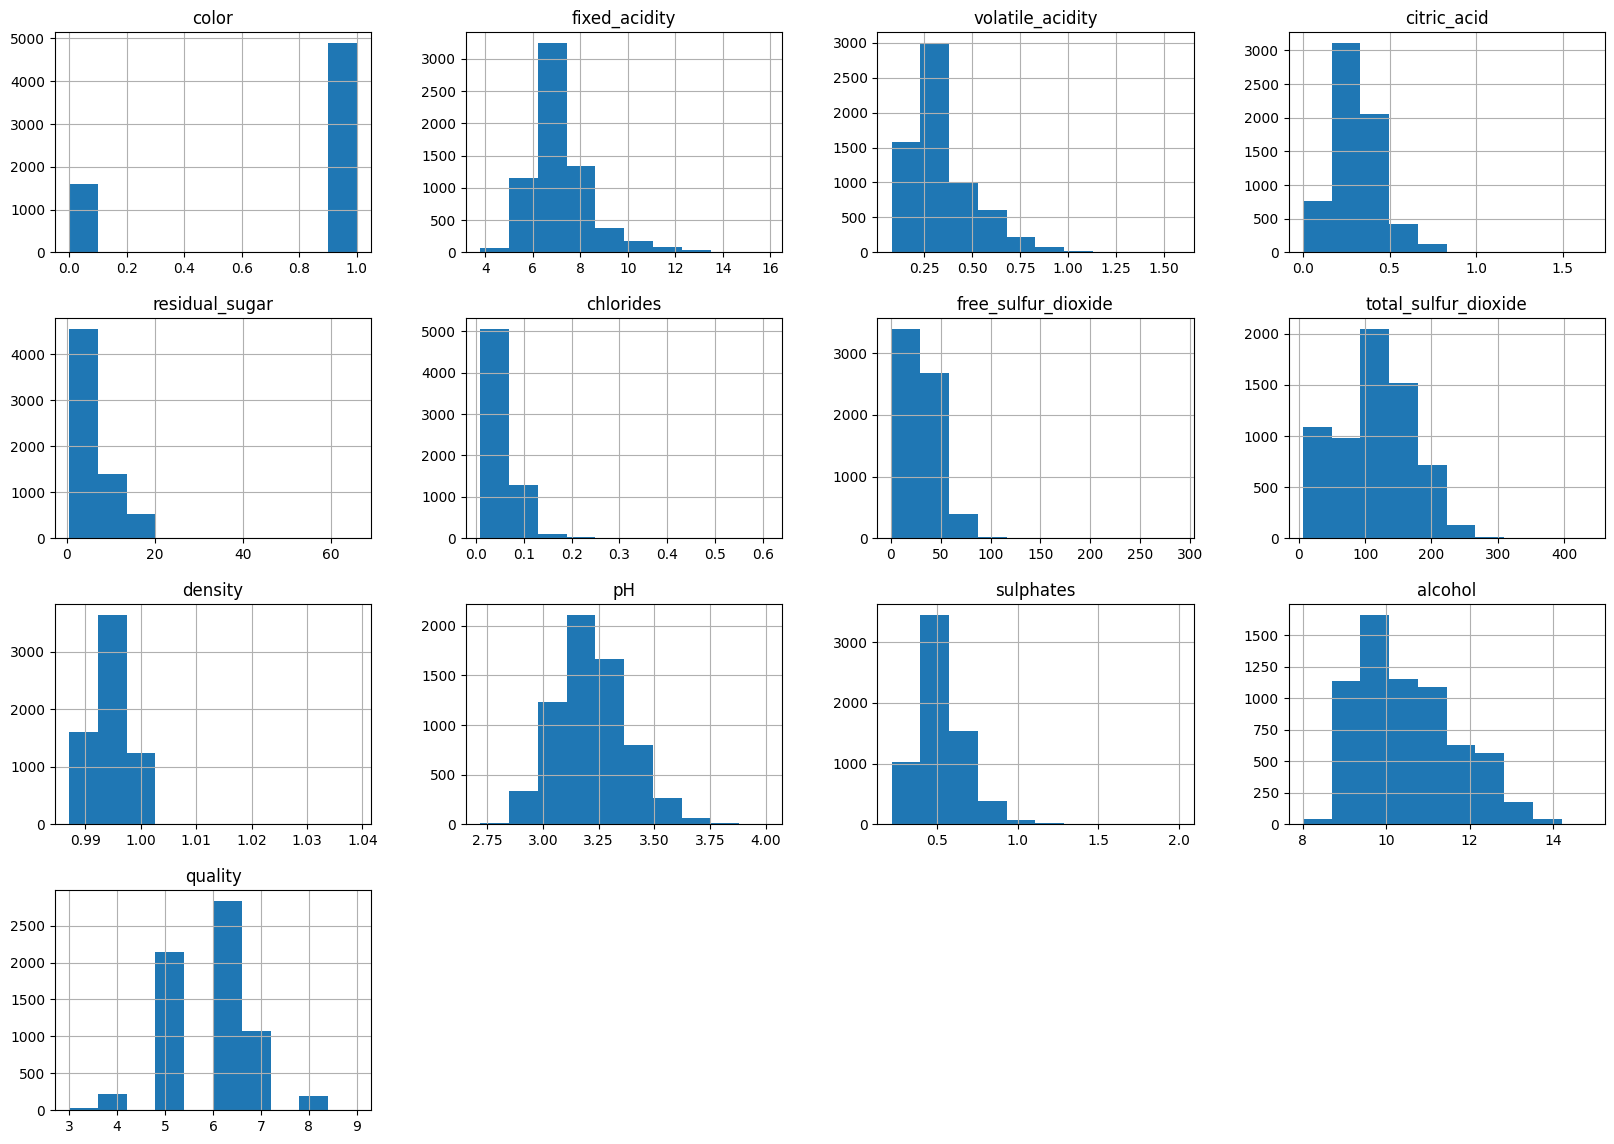

In [43]:
#grafici variabili
df.hist(figsize=(20,14))
plt.show()

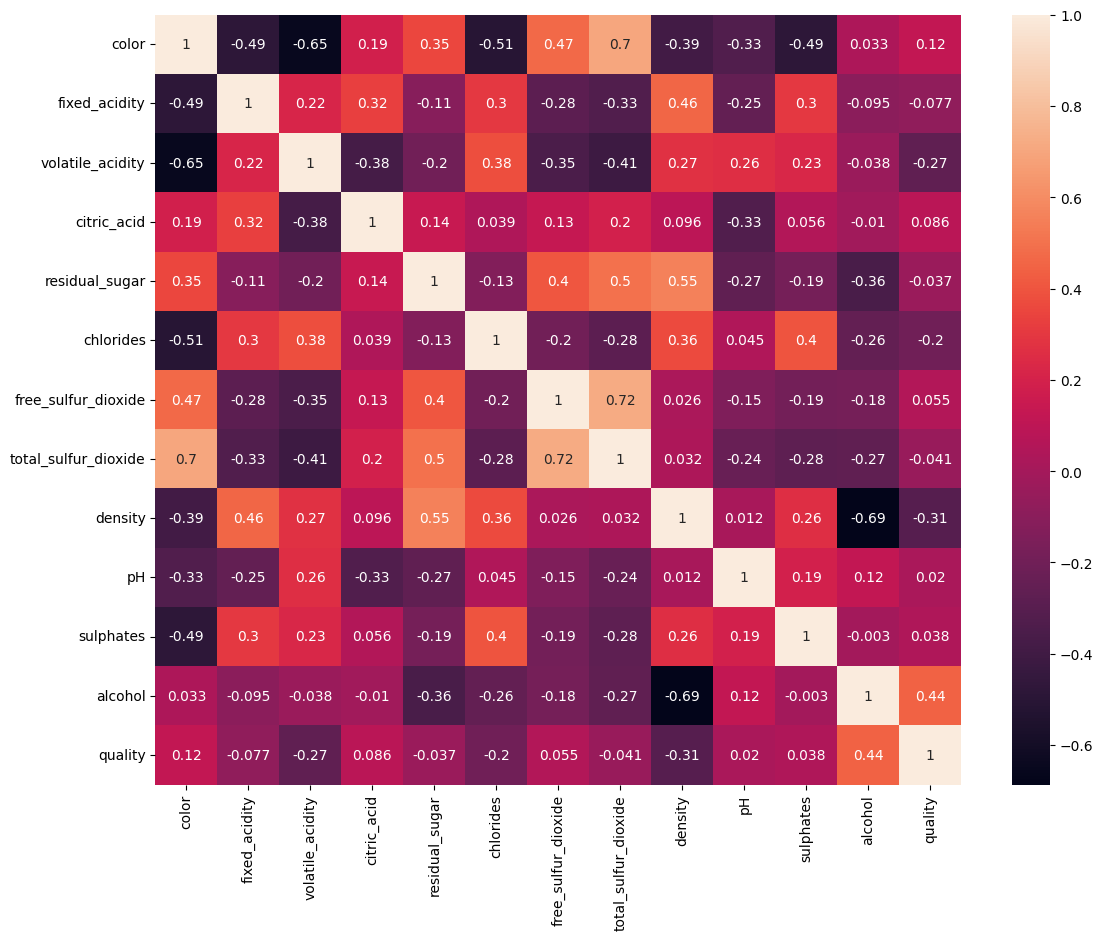

In [44]:
#heatmap correlazioni
plt.figure(figsize=(13, 10))
corr_matrix = df.corr(numeric_only = True)

sns.heatmap(corr_matrix, annot=True)
plt.show()

In [45]:
#C'è una correlazione tra la quantità di alcool e la qualità del vino
#Dal grafico si può notare anche una forte correlazione tra free sulfur dioxide e total sulfur dioxide,
#quindi una delle due variabili deve essere eliminata perchè può creare problemi di multicollinearità,
#scelgo di eliminare total sulfur dioxide perchè meno correlata a quality.

In [46]:
#raggruppando per i vini in base alla loro qualità vediamo che i vini hanno qualità da 3 a 9, e che nei vini con la qualità più alta
#il grado alcolico è più elevato.
df=df.drop("total_sulfur_dioxide", axis=1)
df.groupby('quality').mean()


,color,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,0.666667,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,0.995744,3.257667,0.506333,10.215000
4,0.754630,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,0.994833,3.231620,0.505648,10.180093
5,0.681478,7.326801,0.389614,0.307722,5.804116,0.064666,30.237371,0.995849,3.212189,0.526403,9.837783
6,0.775035,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,0.994558,3.217726,0.532549,10.587553
7,0.815570,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,0.993126,3.228072,0.547025,11.386006
8,0.906736,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,0.992514,3.223212,0.512487,11.678756
9,1.000000,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,0.991460,3.308000,0.466000,12.180000


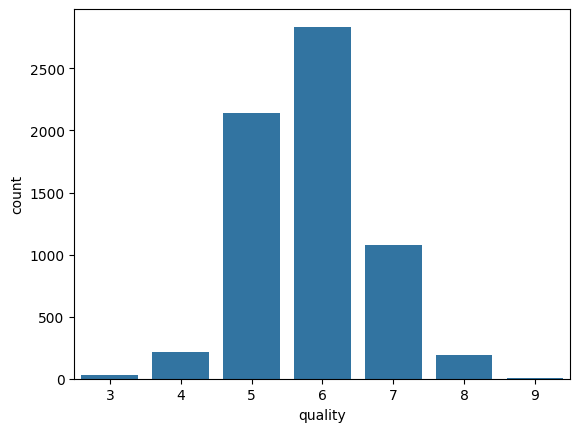

In [47]:
sns.countplot(x=df['quality'])
plt.show()
#grafico che conta i vini in base alla qualità
#i vini con qualità 9 e qualità 3 sono molto pochi, decido di considerarli come outlier ed elimnarli da dataframe


In [48]:
#per avere la conferma di poterli eliminare, conto il numero di vini con qualità 3 o 9, sono solo 35, decido di eliminarli.

df_vote3 = df[df["quality"]==3]
df_vote9 = df[df["quality"]==9]
print('Numero di vini con qualità 3:', df_vote3['quality'].count())
print('Numero di vini con qualità 9:',df_vote9['quality'].count())



Numero di vini con qualità 3: 30
Numero di vini con qualità 9: 5


In [49]:
#elimino i record con qualità 3 e 9
df= df[df.quality!= 9]
df=df[df.quality != 3]

In [50]:
#decido di creare un modello che definirà se un vino è di ottima qualità oppure no.
#creo una colonna 'excelent' per in cui assegno 1 ai vini con qualità superiore a 7 e 0 a tutti gli altri
#dal momento che il modello dovrà dare in output solo due valori o 0 o 1, scelgo di utilizzare la Logistic Regression
df['excellent'] = [1 if x > 6 else 0 for x in df.quality]
display(df)

,color,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,alcohol,quality,excellent
0,0,7.4,0.70,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,0
1,0,7.8,0.88,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5,0
2,0,7.8,0.76,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5,0
3,0,11.2,0.28,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6,0
4,0,7.4,0.70,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,6.2,0.21,0.29,1.6,0.039,24.0,0.99114,3.27,0.50,11.2,6,0
6493,1,6.6,0.32,0.36,8.0,0.047,57.0,0.99490,3.15,0.46,9.6,5,0
6494,1,6.5,0.24,0.19,1.2,0.041,30.0,0.99254,2.99,0.46,9.4,6,0
6495,1,5.5,0.29,0.30,1.1,0.022,20.0,0.98869,3.34,0.38,12.8,7,1


In [51]:
#creo la mia variabile indipendente x, una lista composta da tutte le colonne del df tranne:
#'excelent' che sarà parte della y e 'quality
x = df.drop(["quality", "excellent"], axis=1).values


#creo la mia variabile dipendente y, che contiene i valori della colonna 'excelent'
y = df["excellent"].values


In [52]:
#divido il dataset in porzioni per il test e per il training in modo da confrontare i risultati ottenuti
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5169, 11)
(1293, 11)
(5169,)
(1293,)


In [53]:

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
#normalizzazione dei dati
scaling=StandardScaler()
x_train=scaling.fit_transform(x_train)
x_test=scaling.fit_transform(x_test)


#creo il modello, ho settato arbitrariamente il valore di max_iter a 1000, senza settarlo nell'output mi veniva suggerito di aumentarlo.
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
model.score(x_test,y_test)

#misuro la precisione del modello
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Precisione:', accuracy)

Precisione: 0.8290796597061099


In [54]:

# importo librerie pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# importo librerie validazione
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



# testa e valida una pipeline generica
def pipeline_validation(pipeline, x, y):
    # divido il set in parti due parti training 80% e test 20%
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

    # training
    pipeline.fit(x_train, y_train)

    # predizione
    y_pred = pipeline.predict(x_val)

    # restituisce scarto quadratico medio e coefficiente di determinazione
    mse = mean_squared_error(y_val, y_pred)
    r2  = r2_score(y_val, y_pred)

    scores_df = pd.DataFrame({'rmse': [np.sqrt(mse)], 'r2': [r2]})
    display(scores_df)
    print("\n")

#grafico che permette di visualizzare gli errori su diverse porzioni del dataset, 60%, 70% e 80%.

def plot_learning_curve(pipeline, x, y):

  x_len = len(x)
  train_size_60 = int((x_len * 60) / 100)
  train_size_70 = int((x_len * 70) / 100)
  train_size_80 = int((x_len * 80) / 100)

  train_sizes = [train_size_60, train_size_70, train_size_80]

  train_size_abs, train_scores, valid_scores = learning_curve(pipeline,
                                                           x,
                                                           y,
                                                           train_sizes = train_sizes)

  train_mean = np.mean(train_scores, axis=1)
  valid_mean = np.mean(valid_scores, axis=1)


  scores_df = pd.DataFrame({'train': train_mean, 'validation': valid_mean})
  display(scores_df)

  plt.figure(figsize=(12, 8))
  plt.plot(train_size_abs, train_mean, color='red', marker='o', markersize=5, label='Training Accuracy')
  plt.plot(train_size_abs, valid_mean, color='green', marker='o', markersize=5, label='CrossValidation Accuracy')
  plt.legend()
  plt.show()


,rmse,r2
0,0.438834,-0.178544


,train,validation
0,0.831055,0.805476
1,0.824497,0.806870
2,0.821126,0.807489


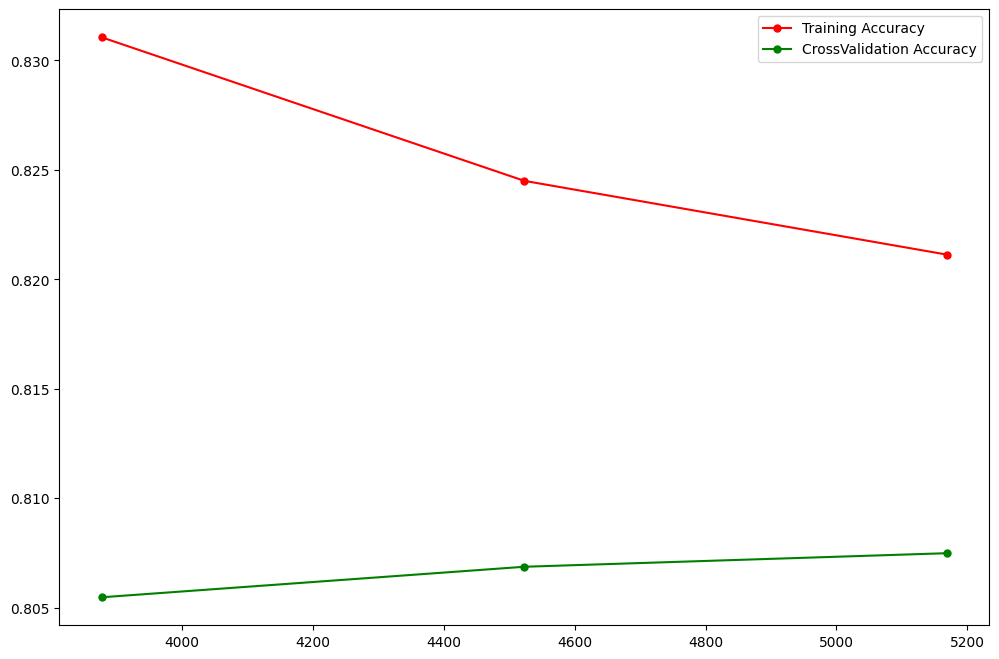

In [55]:
# test del modello
pipeline_validation(make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)), x, y)
plot_learning_curve(make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)), x, y)


In [56]:
#stampo i valori della matrice di confusione, che fa un confronto tra i dati contenuti nel test e i valori predetti.
#Verranno stampati i risultati che contengono il numero di falsi positivi e negativi
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

print("True  Positive: ",  cm[0][0])
print("False Positive: ", cm[0][1])
print("\n")
print("True  Negative: ", cm[1][1])
print("False Negative: ", cm[1][0])

True  Positive:  991
False Positive:  47


True  Negative:  81
False Negative:  174


In [57]:
from sklearn2pmml import sklearn2pmml
from sklearn2pmml.pipeline import PMMLPipeline

#questa funzione permette di salvare il modello e di utilizzarlo in un api

def saveModel():
    #inserisco i nomi delle feature e divido il set in training e test
    X = df.drop(["quality", "excellent"], axis=1).values
    Y = df["excellent"].values
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

    #assegno un nome da inserire nella pipeline per lo scaling e il tipo modello utilizzato
    slc   = StandardScaler()
    logi  = LogisticRegression(max_iter=1000)

    #pipeline di pmml
    pmml_pipe = PMMLPipeline(steps=[ ("slc", slc), ("logi", logi)] )
    pmml_pipe.fit(x_train, y_train)

#salvataggio del modello

    sklearn2pmml(pmml_pipe, "../modello/wine-model.pmml", debug=True)

saveModel()
     

c:\Users\ICTS22-24.473\Desktop\python-exam\.venv\Lib\site-packages\sklearn2pmml\pipeline\__init__.py:68: UserWarning: X is missing feature names. The reproducibility of predictions between Scikit-Learn and PMML can not be guaranteed
  warnings.warn("X is missing feature names. The reproducibility of predictions between Scikit-Learn and PMML can not be guaranteed")
c:\Users\ICTS22-24.473\Desktop\python-exam\.venv\Lib\site-packages\sklearn2pmml\pipeline\__init__.py:75: UserWarning: y is missing target field name(s)
  warnings.warn("y is missing target field name(s)")


python: 3.11.2
sklearn2pmml: 0.99.2
sklearn: 1.2.2
sklearn_pandas: 2.2.0
pandas: 2.1.2
numpy: 1.26.1
dill: 0.3.7
joblib: 1.3.2
java: 21.0.1
Executing command:
java -cp c:\Users\ICTS22-24.473\Desktop\python-exam\.venv\Lib\site-packages\sklearn2pmml\resources\sklearn2pmml-1.0-SNAPSHOT.jar;c:\Users\ICTS22-24.473\Desktop\python-exam\.venv\Lib\site-packages\sklearn2pmml\resources\gson-2.10.1.jar;c:\Users\ICTS22-24.473\Desktop\python-exam\.venv\Lib\site-packages\sklearn2pmml\resources\guava-32.1.1-jre.jar;c:\Users\ICTS22-24.473\Desktop\python-exam\.venv\Lib\site-packages\sklearn2pmml\resources\h2o-genmodel-3.44.0.1.jar;c:\Users\ICTS22-24.473\Desktop\python-exam\.venv\Lib\site-packages\sklearn2pmml\resources\h2o-logger-3.44.0.1.jar;c:\Users\ICTS22-24.473\Desktop\python-exam\.venv\Lib\site-packages\sklearn2pmml\resources\h2o-tree-api-0.3.17.jar;c:\Users\ICTS22-24.473\Desktop\python-exam\.venv\Lib\site-packages\sklearn2pmml\resources\istack-commons-runtime-4.0.1.jar;c:\Users\ICTS22-24.473\Deskt